### RFM 분석
####  사용자별로 얼마나 최근에, 얼마나 자주, 얼마나 많은 금액을 지출했는지에 따라 사용자들의 분포를 확인할 수 있고, 사용자 그룹(또는 등급)을 나누어 분류하는 분석 기법이다. 구매 가능성이 높은 고객을 선정할 때 용이한 데이터 분석 방법이며, 사용자들의 평소 구매 패턴을 기준으로 분류를 진행하기 때문에 각 사용자 그룹의 특성에 따라 차별화된 마케팅 메세지를 전달할 수 있다.

- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary : 얼마나 많은 금액을 지출했는가

### 🛒이커머스 플랫폼 A기업의 RFM 분석
📌이커머스: 온라인을 통해 상품이나 서비스를 사고파는 서비스 (쿠팡, 11번가, 네이버 등)

 
<table style="width: 50%; margin-left:10px;">
    <caption>고객 분석</caption>
    <tr>
        <th>사용자</th>
        <th>구매 횟수</th>
        <th>구매 금액</th>
        <th>최근 구매일</th>
    </tr>
    <tr>
        <th>한동석</th>
        <th>45</th>
        <th>1,980,000</th>
        <th>2개월 전</th>
    </tr>
    <tr>
        <th>주선유</th>
        <th>2</th>
        <th>45,320</th>
        <th>1년 전</th>
    </tr>
</table>

##### 👓 "한동석" 고객을 VIP로 선정해서 연말 선물을 전달하면, 충성심있는 고객으로 유지할 수 있는 전략을 세울 수도 있고,<br> 🎫 "주선유" 고객에게 할인 쿠폰 등 자사의 플랫폼을 이용할 거리를 전달함으로써, 구매를 유도할 수 있는 전략을 세울 수도 있다.

####  RFM을 사용하면 사용자의 특성별로 각기 다른 정책을 적용하고 서비스를 더 잘 사용하게끔 유도하는 전략을 세워볼 수가 있다.

### 데이터셋 확인


In [125]:
import pandas as pd
#엑셀 또는 csv파일 불러오기(csv 파일을 읽어올 때는 구분점이 무엇인지 판단해서 작성해주어여함 콤마(,)가 디폴트
#액셀은 이미 구분되어 있으므로 적을필요 없음 )
retail_orders_df = pd.read_excel('./datasets/Retailer Sales Orders - EU-UK.xlsx')
display(retail_orders_df)


,Order,Item Name,Quantity,Date,Time,Price,Customer ID,Country
0,540040,FELT FARM ANIMAL WHITE BUNNY,48,2011-01-04 14:20:00,2011-01-04 14:20:00,0.19,12483.0,Sweden
1,540040,EAU DE NIL LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
2,540040,IVORY LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
3,540040,BLACK LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
4,540040,FELTCRAFT DOLL ROSIE,12,2011-01-04 14:20:00,2011-01-04 14:20:00,2.95,12483.0,Sweden
...,...,...,...,...,...,...,...,...
470645,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
470646,581586,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
470647,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
470648,581586,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


### 컬럼별 갯수, 평균, 최솟값, 4분위분포, 최댓값, 표준편차 확인하기


In [126]:
#컬럼별 갯수, 평균, 최솟값, 4분위분포, 최댓값, 표준편차 확인하기
display(retail_orders_df.describe().T)

,count,mean,min,25%,50%,75%,max,std
Order,470650.0,561860.118721,539993.0,550987.0,562592.0,572758.0,581587.0,12347.899552
Quantity,470650.0,10.338173,1.0,1.0,3.0,10.0,80995.0,164.392408
Date,470650,2011-07-22 11:00:08.260660736,2011-01-04 10:00:00,2011-04-21 18:10:00,2011-08-07 15:43:00,2011-10-25 18:39:00,2011-12-09 12:50:00,NaN
Time,470650,2011-07-22 11:00:08.260660736,2011-01-04 10:00:00,2011-04-21 18:10:00,2011-08-07 15:43:00,2011-10-25 18:39:00,2011-12-09 12:50:00,NaN
Price,470650.0,3.222389,0.04,1.25,2.08,4.13,649.5,4.335077
Customer ID,355713.0,15346.934967,12346.0,14005.0,15296.0,16837.0,18287.0,1695.614811


### 컬럼의 자세한 정보 (null 개수, dtype)확인 및 메모리 사용량 확인하기

In [127]:
print(retail_orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470650 entries, 0 to 470649
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Order        470650 non-null  int64         
 1   Item Name    470650 non-null  object        
 2   Quantity     470650 non-null  int64         
 3   Date         470650 non-null  datetime64[ns]
 4   Time         470650 non-null  datetime64[ns]
 5   Price        470650 non-null  float64       
 6   Customer ID  355713 non-null  float64       
 7   Country      470650 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 28.7+ MB
None


### 컬럼분석
> Order : 주문번호  
Item Name : 상품명  
Quantity : 주문 갯수  
Date : 주문 날짜  
Time : 주문 시간  
Price : 상품 가격  
Customer ID : 고객 번호  
Country : 주문 나라 

### 중복 데이터 처리

In [128]:
#중복행 갯수 확인
retail_orders_df.duplicated().sum()

#중복행 제거 -> 파라미터에 컬럼명 전달 시 컬럼 값이 같으면 같다고 판단 아무것도 전달하지 않으면 모든 컬럼값이 같아야 같다고 판단
retail_orders_df.drop_duplicates(inplace=True)
display(retail_orders_df)

#인덱스 재생성 -> drop옵션에 true를 주면 기존 인덱스가 제거되고 false를 주면 기존인덱스가 컬럼으로 추가됨
retail_orders_df.reset_index(drop=True,inplace=True)
display(retail_orders_df)

,Order,Item Name,Quantity,Date,Time,Price,Customer ID,Country
0,540040,FELT FARM ANIMAL WHITE BUNNY,48,2011-01-04 14:20:00,2011-01-04 14:20:00,0.19,12483.0,Sweden
1,540040,EAU DE NIL LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
2,540040,IVORY LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
3,540040,BLACK LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
4,540040,FELTCRAFT DOLL ROSIE,12,2011-01-04 14:20:00,2011-01-04 14:20:00,2.95,12483.0,Sweden
...,...,...,...,...,...,...,...,...
470645,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
470646,581586,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
470647,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
470648,581586,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


,Order,Item Name,Quantity,Date,Time,Price,Customer ID,Country
0,540040,FELT FARM ANIMAL WHITE BUNNY,48,2011-01-04 14:20:00,2011-01-04 14:20:00,0.19,12483.0,Sweden
1,540040,EAU DE NIL LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
2,540040,IVORY LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
3,540040,BLACK LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
4,540040,FELTCRAFT DOLL ROSIE,12,2011-01-04 14:20:00,2011-01-04 14:20:00,2.95,12483.0,Sweden
...,...,...,...,...,...,...,...,...
465892,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
465893,581586,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
465894,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
465895,581586,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


### 결측치 처리

In [129]:
#결측치 검사
retail_orders_df.isnull().sum()

#결측치 행 삭제
#결측치가 고객의 구분점인 CustomerID이므로 분석 후 연계 불가능.
# CustomerID가 있는 행만 분석하도록 한다

# retail_orders_df = retail_orders_df[~retail_orders_df.isnull()["Customer ID"]]
retail_orders_df.dropna(subset="Customer ID",inplace=True)
retail_orders_df.reset_index(inplace=True , drop=True)
retail_orders_df

,Order,Item Name,Quantity,Date,Time,Price,Customer ID,Country
0,540040,FELT FARM ANIMAL WHITE BUNNY,48,2011-01-04 14:20:00,2011-01-04 14:20:00,0.19,12483.0,Sweden
1,540040,EAU DE NIL LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
2,540040,IVORY LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
3,540040,BLACK LOVE BIRD CANDLE,24,2011-01-04 14:20:00,2011-01-04 14:20:00,0.42,12483.0,Sweden
4,540040,FELTCRAFT DOLL ROSIE,12,2011-01-04 14:20:00,2011-01-04 14:20:00,2.95,12483.0,Sweden
...,...,...,...,...,...,...,...,...
351001,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
351002,581586,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
351003,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
351004,581586,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


### 데이터 전처리

> Date 컬럼과 Time 컬럼이 중복된 컬럼이므로 Time컬럼 삭제  
Recency는 Date와 현재날짜를 기준으로 설정  
Frequency는 고객이 같은 주문빈도로 설정  
Monetary는 고객별 Price와 Quantity의 곱으로 설정  

In [130]:
retail_orders_df.drop("Time",axis=1,inplace=True)
retail_orders_df

,Order,Item Name,Quantity,Date,Price,Customer ID,Country
0,540040,FELT FARM ANIMAL WHITE BUNNY,48,2011-01-04 14:20:00,0.19,12483.0,Sweden
1,540040,EAU DE NIL LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483.0,Sweden
2,540040,IVORY LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483.0,Sweden
3,540040,BLACK LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483.0,Sweden
4,540040,FELTCRAFT DOLL ROSIE,12,2011-01-04 14:20:00,2.95,12483.0,Sweden
...,...,...,...,...,...,...,...
351001,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
351002,581586,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
351003,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
351004,581586,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


### Recency구하기

In [131]:
from datetime import datetime
now = datetime.now()
retail_orders_df["Recency"] = (now - retail_orders_df["Date"]).dt.days
retail_orders_df


,Order,Item Name,Quantity,Date,Price,Customer ID,Country,Recency
0,540040,FELT FARM ANIMAL WHITE BUNNY,48,2011-01-04 14:20:00,0.19,12483.0,Sweden,4657
1,540040,EAU DE NIL LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483.0,Sweden,4657
2,540040,IVORY LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483.0,Sweden,4657
3,540040,BLACK LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483.0,Sweden,4657
4,540040,FELTCRAFT DOLL ROSIE,12,2011-01-04 14:20:00,2.95,12483.0,Sweden,4657
...,...,...,...,...,...,...,...,...
351001,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,4318
351002,581586,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,4318
351003,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,4318
351004,581586,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,4318


### Monetary구하기

In [132]:
retail_orders_df["Monetary"] =retail_orders_df["Quantity"] * retail_orders_df["Price"]
retail_orders_df

,Order,Item Name,Quantity,Date,Price,Customer ID,Country,Recency,Monetary
0,540040,FELT FARM ANIMAL WHITE BUNNY,48,2011-01-04 14:20:00,0.19,12483.0,Sweden,4657,9.12
1,540040,EAU DE NIL LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483.0,Sweden,4657,10.08
2,540040,IVORY LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483.0,Sweden,4657,10.08
3,540040,BLACK LOVE BIRD CANDLE,24,2011-01-04 14:20:00,0.42,12483.0,Sweden,4657,10.08
4,540040,FELTCRAFT DOLL ROSIE,12,2011-01-04 14:20:00,2.95,12483.0,Sweden,4657,35.40
...,...,...,...,...,...,...,...,...,...
351001,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,4318,23.40
351002,581586,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,4318,23.60
351003,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,4318,30.00
351004,581586,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,4318,214.80


### 고객별 RFM 구하기

In [133]:
retail_customer_rfm = retail_orders_df.groupby("Customer ID").agg({"Recency":"min","Customer ID":"count","Monetary":"sum"})
retail_customer_rfm = retail_customer_rfm.rename(columns={"Customer ID":"Frequency"})
retail_customer_rfm = retail_customer_rfm.reset_index()
retail_customer_rfm

,Customer ID,Recency,Frequency,Monetary
0,12346.0,4643,1,77183.60
1,12349.0,4336,72,1457.55
2,12354.0,4550,58,1079.40
3,12356.0,4340,58,2487.43
4,12358.0,4319,17,928.06
...,...,...,...,...
4100,18280.0,4595,10,180.60
4101,18281.0,4498,7,80.82
4102,18282.0,4325,12,178.05
4103,18283.0,4321,719,2039.58


### 정규화(Normalization)
값의 범위를 0~1사이로 변환시켜 모든 컬럼의 데이터가 평등하게 만들어준다.  
서로 다른 단위의 값은 비교대상이 될 수 없다. 예를 들어, 80kg과 180cm는 비교할 수 없기에 정규화를 사용하여 비교한다.

In [134]:
# 최대값과 최소값의 범위를 정해서 정규화할 수 있는 머신러닝
from sklearn.preprocessing import MinMaxScaler

#  공식 (X - MIN) / (MAX - MIN)

rfm = ["Recency","Frequency","Monetary"]

normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(retail_customer_rfm[rfm])
rfm_normalization = pd.DataFrame(rfm_normalization, columns=rfm)

display(rfm_normalization)

,Recency,Frequency,Monetary
0,0.958702,0.000000,0.285262
1,0.053097,0.009625,0.005373
2,0.684366,0.007727,0.003976
3,0.064897,0.007727,0.009180
4,0.002950,0.002169,0.003416
...,...,...,...
4100,0.817109,0.001220,0.000654
4101,0.530973,0.000813,0.000285
4102,0.020649,0.001491,0.000644
4103,0.008850,0.097330,0.007525


### 데이터 마이닝
- 대규모로 저장된 데이터안에서 체계적이고 자동적으로 통계적 규칙이나 짜임 또는 패턴을 분석하여, 가치있는 정보를 빼내는 과정이다.

### 클러스터 분석(Cluster analysis)
- 주어진 데이터들의 특성을 고려해 데이터 집단을 정의하고 데이터 집단을 대표할 수 있는 대표점을 찾는 것으로 데이터 마이닝의 한 방법이다.
- 클러스터란 비슷한 특성을 가진 데이터들의 집단이고 데이터의 성격에 따라 여러 클러스터(집단)으로 나뉠 수 있다.
- 머신러닝을 사용하여 분석할 수 있으며, 분리할 클러스터 개수를 알려줘야 한다.  
이 때, KElbowVisualizer를 사용해서 최적의 클러스터 개수(elbow)를 먼저 알아낼 수 있다.

### 병합 집단 알고리즘(Agglomerative clustering)
- 점과 점 사이의 거리값을 사용하여 샘플 데이터의 클러스터 쌍을 반복적으로 병합한다.
- 전달받은 클러스터 개수와 일치할 때 종료한다.
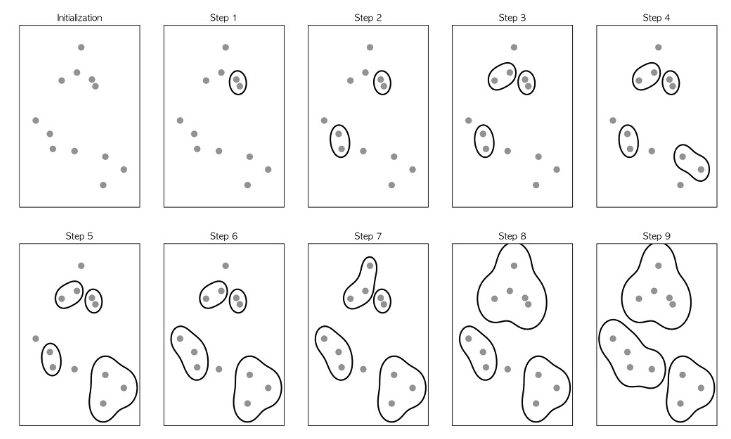

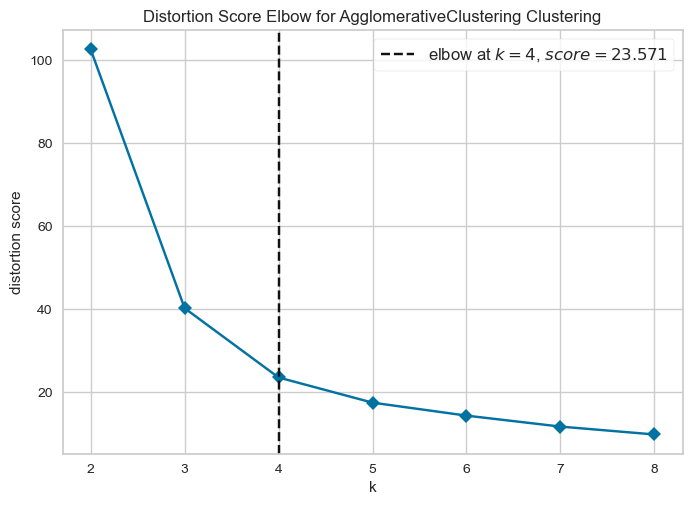

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [135]:
# conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()

# k_elbow_visualizer = KElbowVisualizer(model, k=(3, 9), timings=True)
k_elbow_visualizer = KElbowVisualizer(model, k=(2, 9), timings=False)
k_elbow_visualizer.fit(rfm_normalization)

k_elbow_visualizer.show()

#->score는 집단간의 응집도를 나타내고 k는 집단갯수를 나타내는데 응집도는 낮을수록 군집화가 잘되고, 집단갯수는 많을수록 좋지만 
#집단이 많아지면 모델 학습시 성능이 매우 떨어지므로 기울기가 확 줄기전 즉 집단의 갯수가 늘어난다고해서 응집도가 크게 줄어들지 않는 지점
#그 지점에서의 k값이 분류할 클러스터 갯수로 적합하다고 판단한다.

In [136]:
#클러스터 4개로 군집화
agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(rfm_normalization)

#결과 값 rfm df에 넣고 확인하기
rfm_normalization.loc[:, 'cluster'] = agglomerative_clustering.labels_
rfm_normalization.loc[:, 'cluster'].value_counts()

cluster
0    2510
1     649
2     489
3     457
Name: count, dtype: int64

### 시각화
- matplotlib를 사용하여 데이터를 시각화할 수 있고 이를 통해 한 눈에 볼 수 없는 많은 데이터를 한 눈에 볼 수 있다.
- 데이터 분석에 대한 전문 지식이 없는 일반인도 이해할 수 있다.
- 동일한 통계를 가지고 있더라도, 시각화 시 변화나 패턴이 다를 수 있다.

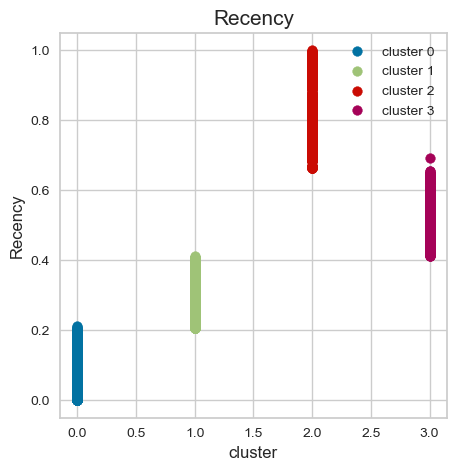

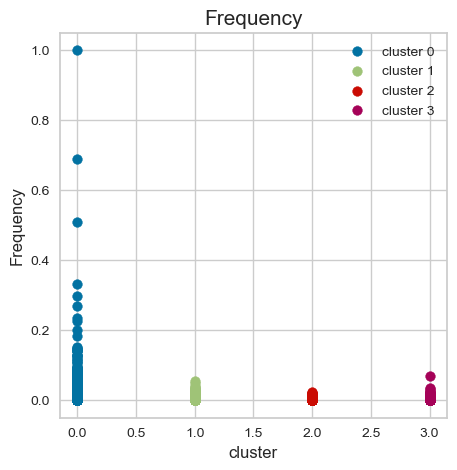

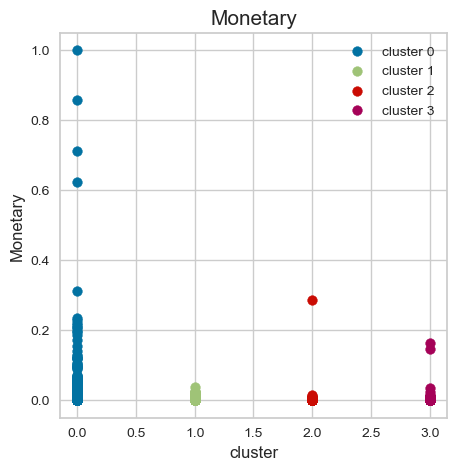

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency : 얼마나 최근에 구매했는가
# Frequency : 얼마나 자주 구매했는가
# Monetary : 얼마나 많은 금액을 지출했는가
titles = ['Recency', 'Frequency', 'Monetary']

# 클러스터(집단) 개수
k = 4

# 각 항목별
for title in titles:
    plt.figure(figsize=(5, 5))
    
    # 집단 별
    for i in range(k):
#     scatter: 산점도(분포도)
        plt.scatter(rfm_normalization.loc[rfm_normalization['cluster'] == i, 'cluster'], 
                    rfm_normalization.loc[rfm_normalization['cluster'] == i, title], 
                    label=f'cluster {i}')

#     색상별 제목(label) 표시
    plt.legend()
    plt.title(title, size=15)
    plt.xlabel('cluster', size=12)
    plt.ylabel(title, size=12)
    plt.show()   

### boxplot
- 데이터의 분포와 이상치를 한 번에 볼 수 있으며, 서로 다른 집단을 쉽게 비교할 수 있는 차트이다.
<div style="display: flex">
    <img src="./images/boxplot2.png" width="400" style="margin-left: 20px">
    <img src="./images/boxplot1.png" width="400" style="margin-left: 20px">
<div>
    
> 상자(Box): 상자의 아랫부분(Q1 또는 25th 백분위수)와 윗부분(Q3 또는 75th 백분위수)은 데이터의 중간 50% 범위를 나타냅니다. 상자의 높이는 이 범위를 나타냅니다.  

> 수염(Whiskers): 상자 위와 아래에 있는 선은 데이터의 최솟값과 최댓값을 나타냅니다. 보통, 수염의 길이는 박스의 높이의 1.5배 범위 이내의 값들로 정해집니다. 범위를 벗어나는 데이터는 이상치로 표시됩니다.  

> 중앙값(Median): 상자 내부에 있는 가로선은 데이터의 중앙값을 나타냅니다.  

> 이상치(Outliers): 수염 바깥에 있는 점들은 이상치로 간주되며, 주어진 데이터 집합에서 다른 값들과 크게 다른 데이터 포인트를 나타냅니다.

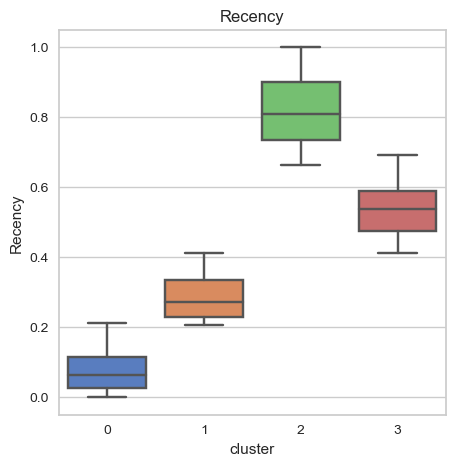

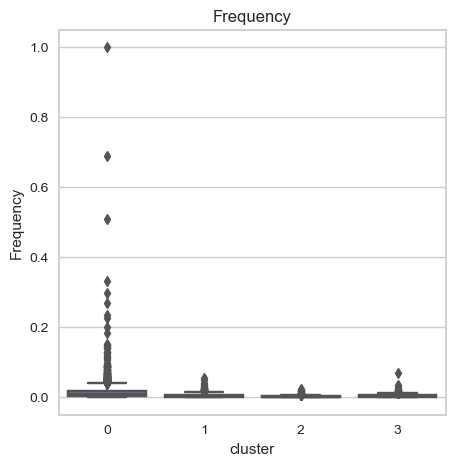

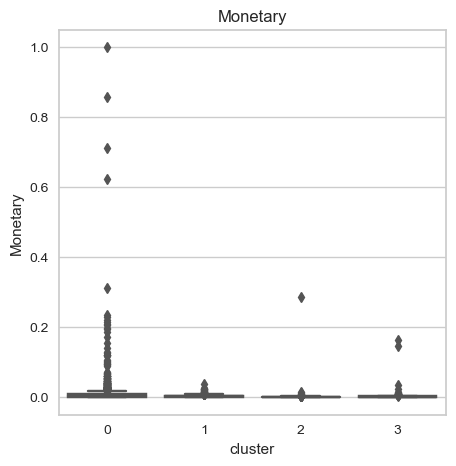

In [138]:
titles = ['Recency', 'Frequency', 'Monetary']

for title in titles:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=rfm_normalization.cluster, y=rfm_normalization[title], palette='muted')
    plt.title(title)
    plt.show()

### 박스 그래프에서 이상치로 판단한 값은 모두 중앙값으로 대체

In [159]:
for i in range(4):
    rfm_normalization.loc[rfm_normalization[(
        rfm_normalization["cluster"]==i)&(
        rfm_normalization["Frequency"]>0.035)].index,"Frequency"]= \
    rfm_normalization[rfm_normalization["cluster"]==i]["Frequency"].median()
    rfm_normalization.loc[rfm_normalization[(
        rfm_normalization["cluster"]==i)&(
        rfm_normalization["Monetary"]>0.02)].index,"Monetary"]=\
    rfm_normalization[rfm_normalization["cluster"]==i]["Monetary"].median()


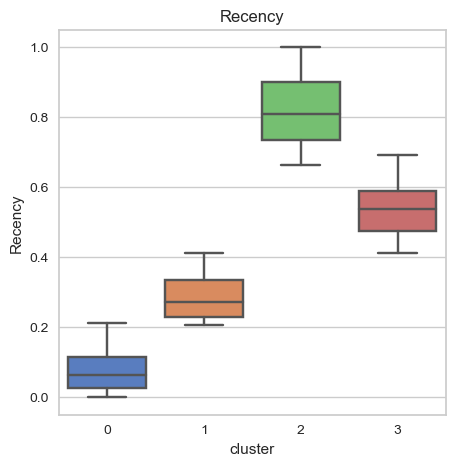

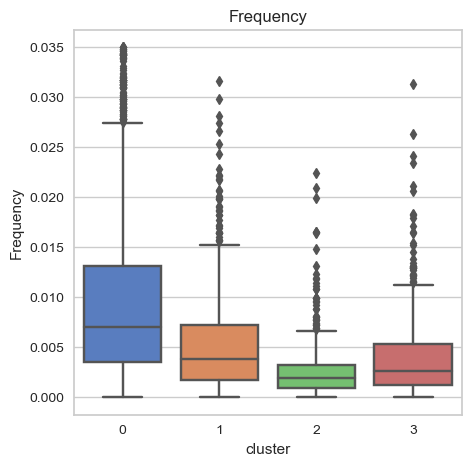

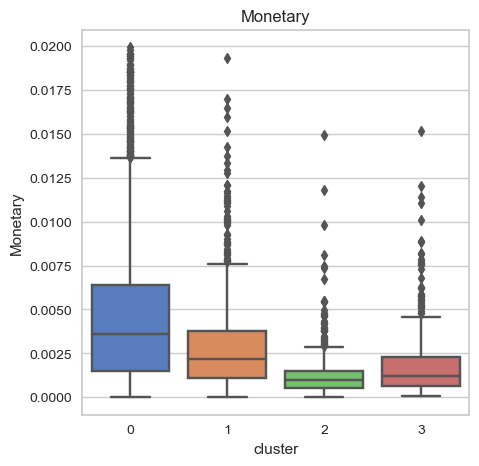

In [160]:
titles = ['Recency', 'Frequency', 'Monetary']

for title in titles:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=rfm_normalization.cluster, y=rfm_normalization[title], palette='muted')
    plt.title(title)
    plt.show()

- R, F, M 점수는 1~4로 계산함.
- 여기서는 최근 구매를 더 중요하다고 가정한다.
> Cluster0: VIP, (4, 4, 4) = 12  
Cluster1: GOLD, (3, 3, 3) = 9  
Cluster2: BRONZE, (1, 1, 1) = 3  
Cluster3: SILVER (2, 2, 2) = 6  

### 원본 고객 rfm 데이터에 정보 추가

In [154]:
retail_customer_rfm['cluster'] = rfm_normalization['cluster'].replace([0, 1, 2, 3], ['VIP', 'GOLD', 'BRONZE', 'SILVER'])
retail_customer_rfm

,Customer ID,Recency,Frequency,Monetary,cluster
0,12346.0,4643,1,77183.60,BRONZE
1,12349.0,4336,72,1457.55,VIP
2,12354.0,4550,58,1079.40,BRONZE
3,12356.0,4340,58,2487.43,VIP
4,12358.0,4319,17,928.06,VIP
...,...,...,...,...,...
4100,18280.0,4595,10,180.60,BRONZE
4101,18281.0,4498,7,80.82,SILVER
4102,18282.0,4325,12,178.05,VIP
4103,18283.0,4321,719,2039.58,VIP


### RFM 클러스터 데이터 시각화

<Axes: xlabel='cluster', ylabel='count'>

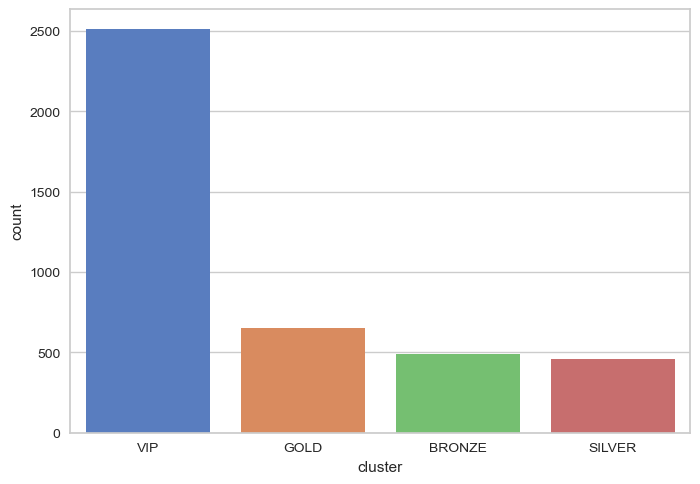

In [161]:
order = ['VIP', 'GOLD', 'BRONZE', 'SILVER']
sns.countplot(x='cluster', data=retail_customer_rfm, palette='muted', order=order)

## 고객 정보 데이터가 있는 테이블이 있다면 조인해 고객의 나이, 결혼여부, 자녀 수 등으로 다양하게 클러스터를 시각화 할 수 있다.